# **Entrenamiento de una red de inteligencia artificial la cual prediga los valores de gravedad en Colombia**

Hecho por: Santiago Escobar Calderón


En este primer modelo se verán varias cosas importantes dentro de la creación de un modelo de machine learning que se pueda utilizar con el ánimo de poder explorar mucho más el campo de la geofísica.

La princiapl idea de este modelo es que mediante datos que se puedan conseguir muy fácilmente se pueda evitar las visitas de campo para las cuales pueden haber muchos problemas entre los cuales podremos encontrar los siguientes:


*   La topografía del lugar
*   Los costos elevados que supone hacer esos estudios
*   Los  errores que se puedan tener al tomar las mediciones
*   Los tiempos de desplazamiento




## Importación de los módulos

En esta parte de la importación de los módulos se importarán todas las librerías necesarias que se tendrán que utilizar para poder crear el modelo de machine learning

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Lectura y depuración de datos

En este paso lo que se quiere verificar es la relación de los elementos con respecto a los análisis que pretende hacer el modelo de inteligencia artificial, esto quiere decir que se verificarán los supuestos de normalidad y correlación entre las variables para poder utilizar estos datos

In [ ]:
Datos=pd.read_csv('/content/drive/MyDrive/Geofisica/ValoresFInales.csv')

In [ ]:
Datos.head(5)

,Unnamed: 0,x,y,Xarreglada,Altura,Gravedad,GravedadTeorica(Miligales),Observada,CorreccionTopografica,CorreccionBouguer,CorreccionLatitud,CorreccionMareas,Raiz_Antiraiz,Raiz_A_Final,CorreccionAiry,Densidad1,Densidad2,ModeloAiry1,ModeloAiry2,CorreccionPratt,CorreccionAireLibre,AnomaliaAireLibre,AnomaliaBouguerTotal,AnomaliaAiry,AnomaliaPratt
0,0,282.2416,9.4815,-77.7584,-1694,-84.0,978189.9637,977583.2630,61.553471,70.993585,0.130136,0.007275,6776.0,-6776.0,-22.918069,2930.707626,3101.188258,-4964618.718,-5253412.909,772.497534,522.70064,-84.0,48.684467,28.864986,821.182000
1,1,282.2583,9.4815,-77.7417,-1684,-86.2,978189.9637,977584.1486,61.553471,70.574497,0.130136,0.013650,6736.0,-6736.0,-22.806140,2931.274669,3100.753374,-4936266.543,-5221668.682,767.143695,519.61504,-86.2,46.071753,26.352646,813.215448
2,2,282.2750,9.4815,-77.7250,-1683,-87.7,978189.9637,977582.9572,61.553471,70.532588,0.130136,0.036050,6732.0,-6732.0,-22.794934,2931.331386,3100.709895,-4933430.723,-5218494.753,766.608867,519.30648,-87.7,44.552245,24.843184,811.161112
3,3,282.2917,9.4815,-77.7083,-1553,-88.0,978189.9637,977622.7700,55.505030,65.084438,0.130136,0.009076,6212.0,-6212.0,-21.317730,2938.723256,3095.072966,-4563837.217,-4806648.316,697.938025,479.19368,-88.0,32.728680,14.340720,730.666705
4,4,282.3083,9.4815,-77.6917,-1607,-87.1,978189.9637,977607.0077,55.505030,67.347516,0.130136,0.013842,6428.0,-6428.0,-21.936296,2935.648265,3097.410783,-4717586.762,-4977539.128,726.257020,495.85592,-87.1,35.896524,16.956164,762.153544


In [ ]:
Datos1= {'Latitud': Datos['y'], 'Longitud':Datos['Xarreglada'],'GObservada':Datos['Observada'],
         'AnomaliaBouguerTotal':Datos['AnomaliaBouguerTotal']}


Datos2=pd.DataFrame(Datos1)

# Verificación de la correlación entre las variables

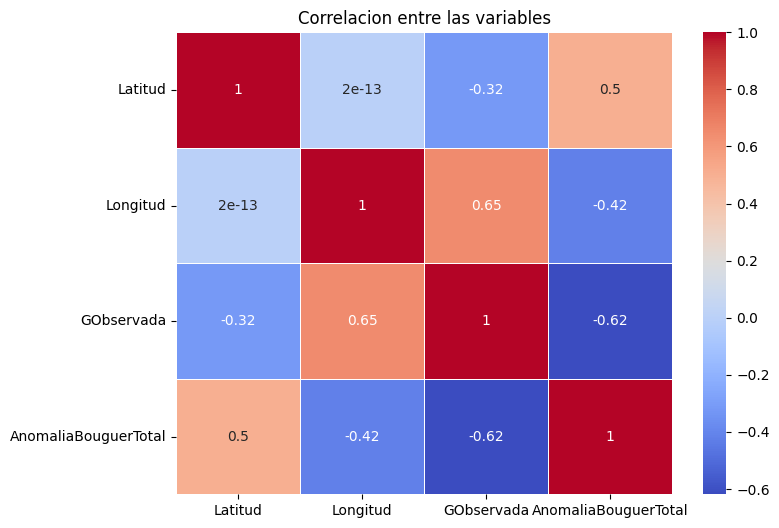

In [ ]:
plt.figure(figsize=(8,6))
matrizcorrelacion=Datos2.corr()
sns.heatmap(matrizcorrelacion, annot=True, cmap='coolwarm',linewidths=0.5)
plt.title('Correlacion entre las variables')
plt.show()

# Verificación de la normalidad de los datos

In [ ]:
Datos2['Coordenadas']=Datos2['Latitud'].astype(str)+', '+Datos2['Longitud'].astype(str)


In [ ]:
Datos2['Codificacion']=Datos2['Coordenadas'].apply(hash)

[]

<Figure size 800x600 with 0 Axes>

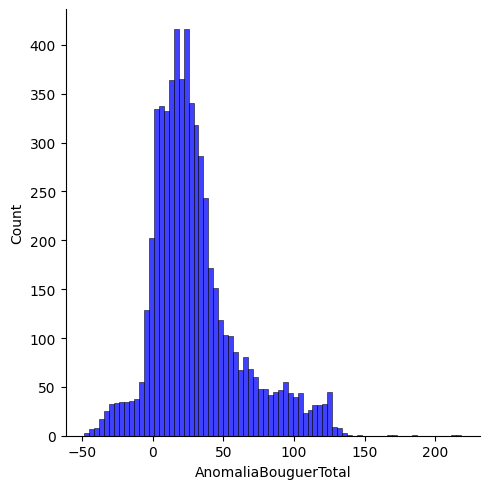

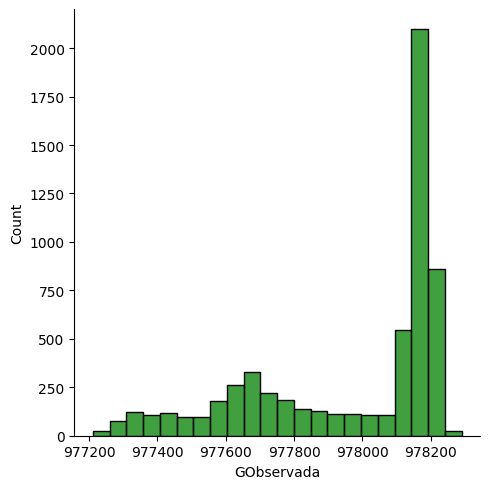

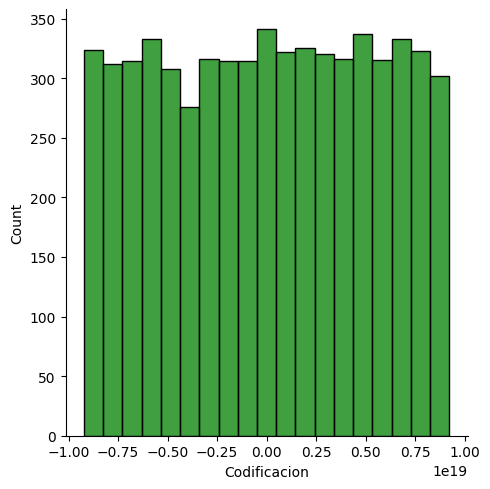

In [ ]:
plt.figure(figsize=(8,6))
sns.displot(Datos2.AnomaliaBouguerTotal, kde=False, color='b')
sns.displot(Datos2.GObservada,kde=False, color="g")
sns.displot(Datos2.Codificacion,kde=False, color="g")
plt.plot()

# Normalización de los datos

En este paso lo primero que haremos es separar los conjuntos de datos en dos datasest, uno que será de prueba y otro que será de entrenamiento, también lo que se planea hacer es eliminar los datos redundantes y normalizarlos para poder utilizarlos dentro del modelo sin ningún problema.

In [ ]:
Entrenamiento= Datos2.sample(frac=0.8, random_state=14)
Prueba= Datos2.drop(Entrenamiento.index)

In [ ]:
Entrenamiento.pop('Latitud')
Entrenamiento.pop('Longitud')
Entrenamiento.pop('Coordenadas')


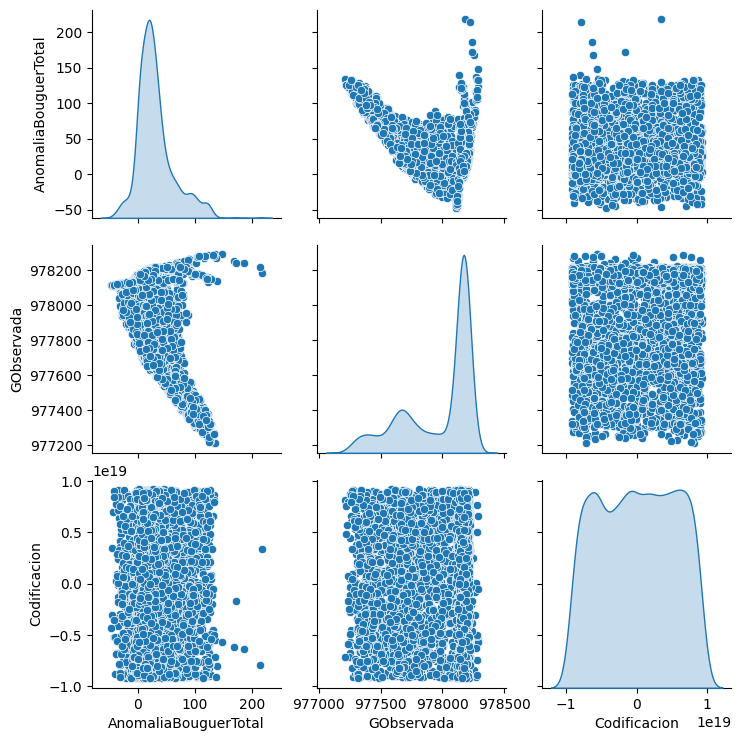

In [ ]:
sns.pairplot(Entrenamiento[["AnomaliaBouguerTotal","GObservada","Codificacion"]], diag_kind='kde')

In [ ]:
EstadisticasGenerales= Entrenamiento.describe()
EstadisticasGenerales.pop("GObservada")
EstadisticasGenerales.pop("Latitud")
EstadisticasGenerales.pop("Longitud")

count    4836.000000
mean      -76.471857
std         0.748548
min       -77.758400
25%       -77.125000
50%       -76.475000
75%       -75.825000
max       -75.191700
Name: Longitud, dtype: float64

In [ ]:
EstadisticasGenerales=EstadisticasGenerales.transpose()
EstadisticasGenerales

,count,mean,std,min,25%,50%,75%,max
AnomaliaBouguerTotal,4836.0,3.014724e+01,3.174429e+01,-4.817628e+01,9.819494e+00,2.359916e+01,4.166110e+01,2.181834e+02
Codificacion,4836.0,2.156184e+16,5.340813e+18,-9.222223e+18,-4.718338e+18,4.371651e+16,4.649749e+18,9.218714e+18


In [ ]:
Train_stats=EstadisticasGenerales

In [ ]:
Train_etiquetas= Entrenamiento.pop('GObservada')
Prueba_etiquetas = Prueba.pop('GObservada')

In [ ]:
def normalizacion(x):
  return (x-Train_stats['mean'])/Train_stats['std']

DatosNormalesTrain=normalizacion(Entrenamiento)
DatosNormalesPrueba=normalizacion(Prueba)

In [ ]:
DatosNormalesTrain.pop('Coordenadas')
DatosNormalesTrain.pop('Latitud')
DatosNormalesTrain.pop('Longitud')



In [ ]:
DatosNormalesPrueba.pop('Coordenadas')
DatosNormalesPrueba.pop('Latitud')
DatosNormalesPrueba.pop('Longitud')

4      NaN
5      NaN
7      NaN
15     NaN
21     NaN
        ..
5996   NaN
6000   NaN
6016   NaN
6024   NaN
6038   NaN
Name: Longitud, Length: 1209, dtype: float64

## Creación de la red neuronal que se utilizará para entrenar el modelo

En este paso se creará el modelo en el cual se utilizará el modelo para ver si las predicciones son buenas o por si el contrario estas no son buenas y se necesita volver a crear el modelo

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(Entrenamiento.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
modelo= build_model()

In [ ]:
modelo.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                192       
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4417 (17.25 KB)
Trainable params: 4417 (17.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
Prueba= DatosNormalesTrain[:10]
ejemplo= modelo.predict(Prueba)
ejemplo

1/1 [==============================] - 0s 100ms/step


array([[-0.36336333],
       [-0.03669681],
       [-0.03478725],
       [-0.03969926],
       [-0.35191956],
       [-0.05031472],
       [-0.1128996 ],
       [-0.01534037],
       [-0.18503639],
       [-0.11664882]], dtype=float32)

# Entrenamiento del modelo

en esta parte podeos ver el comportamiento de varias funciones como la función de perdida y costo además de la validación y el error medio cuadrático y el error medio absoluto que se tiene

In [ ]:
Historia =modelo.fit(
    DatosNormalesTrain, Train_etiquetas,
    epochs=1000, validation_split= 0.2, verbose=0,
)

In [ ]:
Historia1= pd.DataFrame(Historia.history)
Historia1['epoch']=Historia.epoch
Historia1.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,87695.968750,239.194748,87695.968750,3258536.75,284.969452,3258536.75,995
996,91583.187500,243.813950,91583.187500,3258289.25,360.805023,3258289.25,996
997,90732.414062,244.061584,90732.414062,3229563.75,286.359131,3229563.75,997
998,91092.507812,239.695007,91092.507812,3234856.00,238.562958,3234856.00,998
999,89496.476562,242.149307,89496.476562,3306441.50,265.348267,3306441.50,999


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['loss'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['mae'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['mse'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['loss'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['mae'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['mse'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_8, *[[['index', 'loss'], ['loss', 'mae'], ['mae', 'mse'], ['mse', 'val_loss']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_9, *['index', 'loss', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_10, *['index', 'mae', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_11, *['index', 'mse', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_12, *['index', 'val_loss', None], **{})
chart

# Probar el modelo

In [ ]:
Perdida, mae, mse= modelo.evaluate(DatosNormalesPrueba, Prueba_etiquetas, verbose=2)
print(f'Error medio absoluto es de : {mae} miligales')

38/38 - 0s - loss: 83030.0156 - mae: 216.3387 - mse: 83030.0156 - 255ms/epoch - 7ms/step
Error medio absoluto es de : 216.33871459960938 miligales


38/38 [==============================] - 0s 5ms/step


Text(0, 0.5, 'Predictions Miligales')

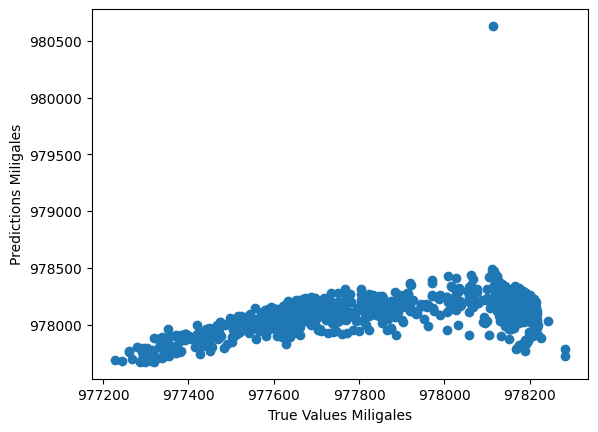

In [ ]:
Predicciones= modelo.predict(DatosNormalesPrueba).flatten()

plt.scatter(Prueba_etiquetas, Predicciones)
plt.xlabel('True Values Miligales')
plt.ylabel('Predictions Miligales')



In [ ]:
Predicciones

array([978102.25, 978098.3 , 978162.44, ..., 978153.6 , 978253.44,
       978464.06], dtype=float32)

In [ ]:


# Realiza una predicción
prediccion = modelo.predict([[0.14152,-0.18541]])

1/1 [==============================] - 0s 73ms/step


In [ ]:
prediccion

array([[978117.1]], dtype=float32)